In [1]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()
from pyquil.api import get_qc


In [18]:
def h2_jw_small(x):
    prog=Program()
    prog+=X(0)
    prog+=X(3)
    prog+=H(0)
    prog+=H(1)
    prog+=H(2)
    prog+=RX(1.57,3)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[0],3)
    prog+=CNOT(2,3)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=H(0)
    prog+=H(1)
    prog+=H(2)
    prog+=RX(-1.57,3)
    return prog

In [19]:
print(h2_jw_small([0]))

X 0
X 3
H 0
H 1
H 2
RX(1.57) 3
CNOT 0 1
CNOT 1 2
CNOT 2 3
RZ(0) 3
CNOT 2 3
CNOT 1 2
CNOT 0 1
H 0
H 1
H 2
RX(-1.57) 3



In [20]:
import openfermionpyscf as ofpyscf
import openfermion as of
from openfermion.transforms import *
from openfermion.utils import *
from openfermion.hamiltonians import MolecularData
import numpy as np
import pyscf

In [21]:
from openfermionpyscf import *
geometry = [["H", [0, 0, 0]],
            ["H", [0, 0, 0.7414]]]
basis = "sto-3g"
multiplicity = 1
charge = 0
molecule = MolecularData(geometry, basis, multiplicity, charge)
h2_molecule = run_pyscf(molecule, run_mp2=True, run_cisd=True, run_ccsd=True, run_fci=True)

In [22]:
print(molecule.fci_energy)

-1.1372701746609022


In [23]:
import openfermionpyscf as ofpyscf
from openfermion.ops import QubitOperator
from forestopenfermion import pyquilpauli_to_qubitop, qubitop_to_pyquilpauli
hamiltonian = ofpyscf.generate_molecular_hamiltonian(
    geometry, basis, multiplicity, charge)
qubit_operator=jordan_wigner(hamiltonian)
hamiltonian_jw_pauli=qubitop_to_pyquilpauli(qubit_operator)
print(qubit_operator)
print(hamiltonian_jw_pauli)

-0.0988639693354571 [] +
-0.045322202052874 [X0 X1 Y2 Y3] +
0.045322202052874 [X0 Y1 Y2 X3] +
0.045322202052874 [Y0 X1 X2 Y3] +
-0.045322202052874 [Y0 Y1 X2 X3] +
0.17119774903432944 [Z0] +
0.16862219158920938 [Z0 Z1] +
0.120544822053018 [Z0 Z2] +
0.165867024105892 [Z0 Z3] +
0.17119774903432947 [Z1] +
0.165867024105892 [Z1 Z2] +
0.120544822053018 [Z1 Z3] +
-0.22278593040418496 [Z2] +
0.17434844185575687 [Z2 Z3] +
-0.22278593040418496 [Z3]
(-0.0988639693354571+0j)*I + (0.17119774903432944+0j)*Z0 + (0.17119774903432947+0j)*Z1 + (-0.22278593040418496+0j)*Z2 + (-0.22278593040418496+0j)*Z3 + (0.16862219158920938+0j)*Z0*Z1 + (0.120544822053018+0j)*Z0*Z2 + (0.165867024105892+0j)*Z0*Z3 + (0.165867024105892+0j)*Z1*Z2 + (0.120544822053018+0j)*Z1*Z3 + (0.17434844185575687+0j)*Z2*Z3 + (-0.045322202052874+0j)*X0*X1*Y2*Y3 + (0.045322202052874+0j)*X0*Y1*Y2*X3 + (0.045322202052874+0j)*Y0*X1*X2*Y3 + (-0.045322202052874+0j)*Y0*Y1*X2*X3


In [24]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,minimizer_kwargs={'method': 'nelder-mead'})

In [25]:
angle=[0.0]
x = vqe_inst.vqe_run(h2_jw_small, hamiltonian_jw_pauli, angle, None, qvm=qvm,disp=print,return_all=True)
print(x)

                     models will be ineffective
	Parameters: [-0.0005] 
	E => -0.3512808430462356
	Parameters: [-0.0015] 
	E => -0.3514621316985449
	Parameters: [-0.0035] 
	E => -0.3518247080054072
	Parameters: [-0.0075] 
	E => -0.3525498515520503
	Parameters: [-0.0155] 
	E => -0.35400006176944376
	Parameters: [-0.0315] 
	E => -0.3568998498691109
	Parameters: [-0.0635] 
	E => -0.36269429902280825
	Parameters: [-0.1275] 
	E => -0.37424193811574136
	Parameters: [-0.2555] 
	E => -0.39700715395633657
	Parameters: [-0.5115] 
	E => -0.4399284418328845
	Parameters: [-1.0235] 
	E => -0.5059988248656064
	Parameters: [-1.5355] 
	E => -0.5122671537621665
	Parameters: [-1.5355] 
	E => -0.5280812732451294
	Parameters: [-1.5355] 
	E => -0.5317002682492749
	Parameters: [-1.5995] 
	E => -0.5324040430545961
	Parameters: [-1.5675] 
	E => -0.5324777421237433
	Parameters: [-1.5675] 
	E => -0.532464095181484
	Parameters: [-1.5675] 
	E => -0.532476719797489
	Parameters: [-1.5715] 
	E => -0.5324786812683278


In [1]:
import numpy as np

thetas = np.linspace(-0.5,0.5,100)

In [2]:
E = [vqe_inst.expectation(h2_jw_small([param]),hamiltonian_jw_pauli, None ,qvm) for param in thetas]

NameError: name 'vqe_inst' is not defined

In [114]:
param=x.iteration_params
hasil=x.expectation_vals

[array([-0.0005]), array([-0.0015]), array([-0.0035]), array([-0.0075]), array([-0.0155]), array([-0.0315]), array([-0.0635]), array([-0.1275]), array([-0.2555]), array([-0.2555]), array([-0.2235]), array([-0.2235]), array([-0.2235]), array([-0.2275]), array([-0.2255]), array([-0.2265]), array([-0.226]), array([-0.22625]), array([-0.226125]), array([-0.226125])]


<Figure size 1440x1440 with 0 Axes>

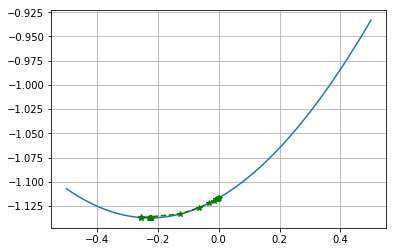

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.figure()
plt.grid()
plt.plot(thetas,E)
plt.plot(param,hasil,'g--*')

Text(0,0.5,'E')

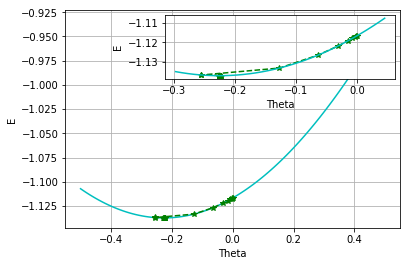

In [190]:
fig, ax = plt.subplots()
ax.plot(thetas, E,'c')
ax.plot(param, hasil,'g--*')
ax.grid()
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.0, loc=1) 
axins.plot(param, hasil,'g--*')
axins.plot(thetas[20:55],E[20:55],'c')
axins.grid()
ax.set_xlabel('Theta')
ax.set_ylabel('E')
axins.set_xlabel('Theta')
axins.set_ylabel('E')

In [124]:
vqe_inst1 = VQE(minimizer=minimize,minimizer_kwargs={'method': 'Powell'})

In [141]:
angle=[0.0]
result_powell= vqe_inst1.vqe_run(h2_jw_small, hamiltonian_jw_pauli, angle, None, qvm=qvm,disp=print,return_all=True)


                     models will be ineffective
	Parameters: [-0.22712287] 
	E => -1.137265872653807
	Parameters: [-0.22613622] 
	E => -1.1372701635211568


In [175]:
thetas = np.linspace(-0.5,0.5,100)

E_powell = [vqe_inst.expectation(h2_jw_small([param]),hamiltonian_jw_pauli, None ,qvm) for param in thetas]

In [176]:
param_powell=result_powell.iteration_params
hasil_powell=result_powell.expectation_vals
print(param_powell)

[array([-0.22712287]), array([-0.22613622])]


<Figure size 1440x1440 with 0 Axes>

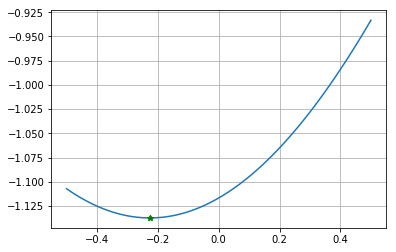

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.figure()
plt.grid()
plt.plot(thetas,E)
plt.plot(param_powell,hasil_powell,'g--*')


Text(0,0.5,'E')

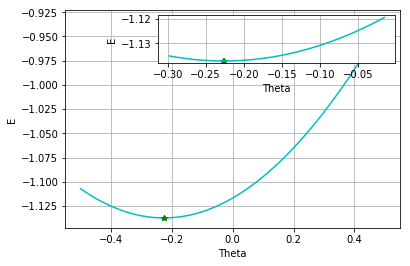

In [173]:
fig, ax = plt.subplots()
ax.plot(thetas, E_powell,'c')
ax.plot(param_powell, hasil_powell,'g--*')
ax.grid()
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax,2.5,loc=1) 
axins.plot(param_powell, hasil_powell,'g--*')
axins.plot(thetas[20:49],E_powell[20:49],'c')
axins.grid()
ax.set_xlabel('Theta')
ax.set_ylabel('E')
axins.set_xlabel('Theta')
axins.set_ylabel('E')

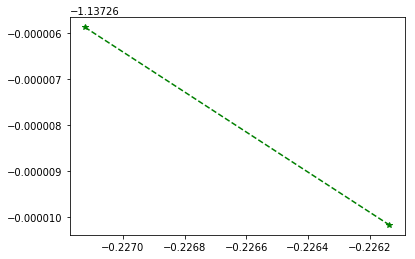

In [171]:
plt.plot(param_powell, hasil_powell,'g--*')

In [174]:
vqe_inst2 = VQE(minimizer=minimize,minimizer_kwargs={'method': 'SLSQP'})

In [179]:
result_slsqp = vqe_inst2.vqe_run(h2_jw_small, hamiltonian_jw_pauli, angle, None, qvm=qvm,disp=print,return_all=True)
print(result_slsqp)

                     models will be ineffective
	Parameters: [-0.18128878] 
	E => -1.1166843843839254
	Parameters: [-0.22659796] 
	E => -1.1364571808919404
	Parameters: [-0.22659796] 
	E => -1.137270077369877
{'x': array([-0.22659796]), 'fun': -1.1372700773643136, 'iteration_params': [array([-0.22659796]), array([-0.22659796]), array([-0.22659796])], 'expectation_vals': [-1.1166843843839254, -1.1364571808919404, -1.137270077369877]}


In [191]:
thetas = np.linspace(-0.5,0.5,100)

E_slsqp = [vqe_inst2.expectation(h2_jw_small([param]),hamiltonian_jw_pauli, None ,qvm) for param in thetas]

In [192]:
param_slsqp=result_slsqp.iteration_params
hasil_slsqp=result_slsqp.expectation_vals

Text(0,0.5,'E')

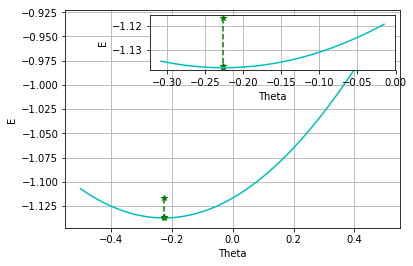

In [193]:
fig, ax = plt.subplots()
ax.plot(thetas, E_slsqp,'c')
ax.plot(param_slsqp, hasil_slsqp,'g--*')
ax.grid()
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.5, loc=1) 
axins.plot(param_slsqp, hasil_slsqp,'g--*')
axins.plot(thetas[19:49],E_slqp[19:49],'c')
axins.grid()
ax.set_xlabel('Theta')
ax.set_ylabel('E')
axins.set_xlabel('Theta')
axins.set_ylabel('E')